<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/5_2_Linear_Classifiers_in_Python_Loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-2 Linear Classifiers in Python - Loss functions

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC

from mlxtend.plotting import plot_decision_regions

from scipy.optimize import minimize

## Linear classifiers: the coefficients

### Dot Product

In [2]:
x = np.arange(3)
y = np.arange(3, 6)
display(x)
display(y)

array([0, 1, 2])

array([3, 4, 5])

In [3]:
x.dot(y)

np.int64(14)

In [4]:
sum([x * y for x, y in zip(x, y)])

np.int64(14)

In [5]:
(x * y).sum()

np.int64(14)

In [6]:
x @ y

np.int64(14)

### Linear classifier prediction

- $\text{raw model output} = \text{coefficients} \cdot \text{features} + \text{intercept}$
- Linear classifier prediction: compute raw model output, check the **sign**
    - If positive, predict one class
    - If negative, predict the other class
- This is the same for **logistic regression** and **linear SVM**
    - `fit` is different, but `predict` is the same

This is the **sigmoid** function

$$
S(z) = \frac{1}{1 + e^{-z}}
$$

In [7]:
breast_cancer = datasets.load_breast_cancer()

display(breast_cancer.feature_names)
display(breast_cancer.target_names)

X, y = breast_cancer.data, breast_cancer.target
X.shape, y.shape

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

array(['malignant', 'benign'], dtype='<U9')

((569, 30), (569,))

In [8]:
# 0: malignant, 1: benign
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [9]:
lr = LogisticRegression()
lr.fit(X, y)
lr.predict(X)[10], lr.predict(X)[20]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(np.int64(0), np.int64(1))

In [10]:
lr.coef_ @ X[10] + lr.intercept_ # raw model output < 0, predict 0

array([-6.49542007])

In [11]:
lr.coef_ @ X[20] + lr.intercept_ # raw model output >= 0, predict 1

array([5.50361585])

In [12]:
# prediction by raw model
raw_model_output = X @ lr.coef_.T + lr.intercept_
prediction = raw_model_output >= 0
prediction = prediction.astype(int).flatten()
prediction == lr.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

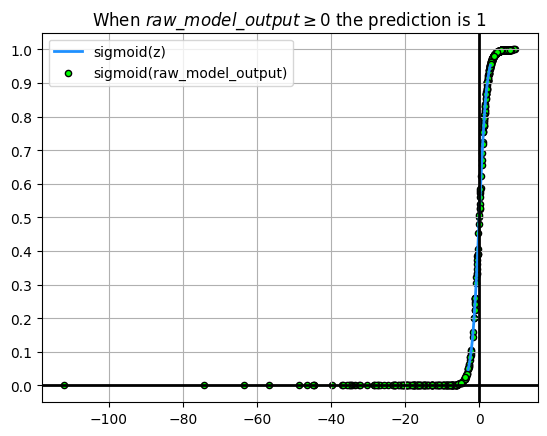

In [13]:
z = np.linspace(-3, 3, 100)
sig = lambda z:  1 / (1 + np.exp(-z))

plt.title('When $raw\_model\_output \geq 0$ the prediction is 1')
plt.plot(z, sig(z), c='dodgerblue', linewidth=2, label='sigmoid(z)')
plt.scatter(raw_model_output, sig(raw_model_output), c='lime', s=20, edgecolor='k', label='sigmoid(raw_model_output)')

plt.axvline(0, 0, 1, linewidth=2, c='k')
plt.axhline(0, -3, 3, linewidth=2, c='k')

plt.yticks(np.linspace(0, 1, 11))
plt.legend()
plt.grid()

### Changing the model coefficients

In [14]:
X = np.array([
       [ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

X.shape, y.shape

((20, 2), (20,))

In [15]:
model_coef_ = np.array([0, 1])
model_intercept_ = np.array([0])

raw_model_output = X @ model_coef_ + model_intercept_
predictions = raw_model_output
predictions = np.where(predictions >= 0, 1, -1)

predictions

array([ 1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1])

The decision boundary is the line where $w \cdot x + b = 0$

In [16]:
x1, x2 = sp.symbols('x1 x2')
w1, w2 = sp.symbols('w1 w2')
b = sp.symbols('b')

decision_boundary = sp.Eq(w1 * x1 + w2 * x2 + b, 0)
decision_boundary

Eq(b + w1*x1 + w2*x2, 0)

In [17]:
decision_boundary.subs({w1:0, w2:1, b:0})

Eq(x2, 0)

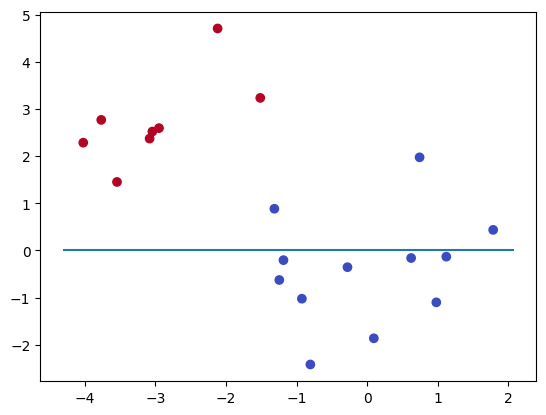

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.hlines(0, xmin=plt.xlim()[0], xmax=plt.xlim()[1])

plt.show()

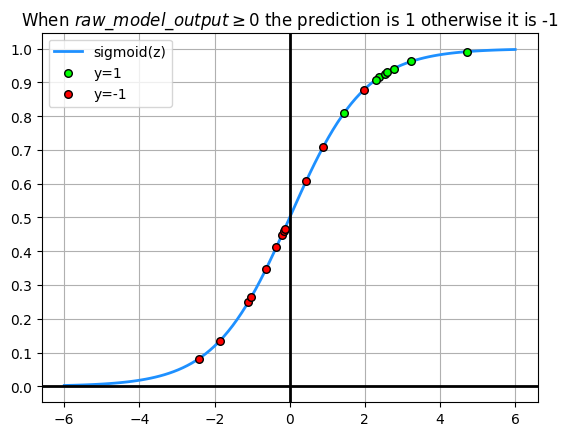

In [19]:
z = np.linspace(-6, 6, 100)
sig = lambda z:  1 / (1 + np.exp(-z))

plt.title('When $raw\_model\_output \geq 0$ the prediction is 1 otherwise it is -1')
plt.plot(z, sig(z), c='dodgerblue', linewidth=2, label='sigmoid(z)')
plt.scatter(raw_model_output[y == 1], sig(raw_model_output[y == 1]), c='lime', s=30, edgecolor='k', label='y=1', zorder=100)
plt.scatter(raw_model_output[y == -1], sig(raw_model_output[y == -1]), c='red', s=30, edgecolor='k', label='y=-1', zorder=101)

plt.axvline(0, 0, 1, linewidth=2, c='k')
plt.axhline(0, -3, 3, linewidth=2, c='k')

plt.yticks(np.linspace(0, 1, 11))
plt.legend()
plt.grid()

In [20]:
# we can see in the above graph that there
#. are 3 points on the wrong side of the
#. decision boundary
np.sum(y != predictions)

np.int64(3)

In [21]:
# attempt to get 0 errors
model_coef_ = np.array([-1, 1])
model_intercept_ = np.array([-2.5])

raw_model_output = X @ model_coef_ + model_intercept_
predictions = raw_model_output
predictions = np.where(predictions >= 0, 1, -1)

predictions

array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [22]:
decision_boundary.subs({w1:-1, w2:1, b:-2.5})

Eq(-x1 + x2 - 2.5, 0)

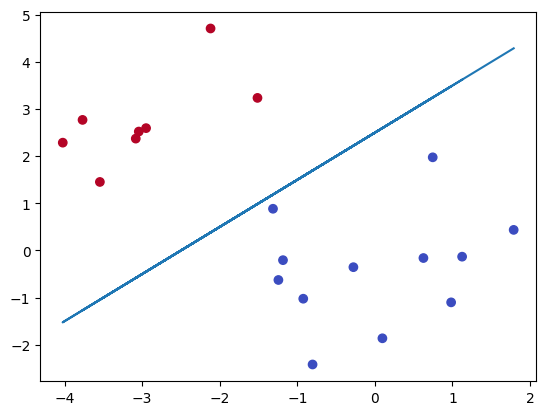

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(X[:, 0], X[:, 0] + 2.5)

plt.show()

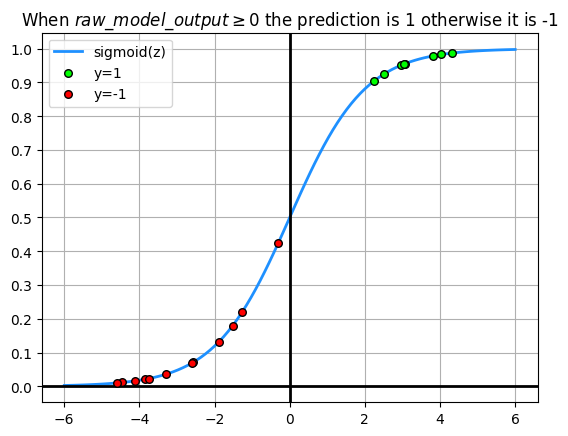

In [24]:
z = np.linspace(-6, 6, 100)
sig = lambda z:  1 / (1 + np.exp(-z))

plt.title('When $raw\_model\_output \geq 0$ the prediction is 1 otherwise it is -1')
plt.plot(z, sig(z), c='dodgerblue', linewidth=2, label='sigmoid(z)')
plt.scatter(raw_model_output[y == 1], sig(raw_model_output[y == 1]), c='lime', s=30, edgecolor='k', label='y=1', zorder=100)
plt.scatter(raw_model_output[y == -1], sig(raw_model_output[y == -1]), c='red', s=30, edgecolor='k', label='y=-1', zorder=101)

plt.axvline(0, 0, 1, linewidth=2, c='k')
plt.axhline(0, -3, 3, linewidth=2, c='k')

plt.yticks(np.linspace(0, 1, 11))
plt.legend()
plt.grid()

In [25]:
# no errors
np.sum(y != predictions)

np.int64(0)

### Trying that data with Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [27]:
lr.coef_, lr.intercept_

(array([[-1.12566322,  1.1091444 ]]), array([-3.59041016]))

In [28]:
raw_model_output = X @ lr.coef_.T + lr.intercept_
raw_model_output

array([[-5.11965099],
       [-5.76591631],
       [-3.6716434 ],
       [ 2.51171746],
       [ 2.63403351],
       [-1.13026697],
       [ 4.01810879],
       [ 2.608846  ],
       [ 2.01263769],
       [-5.91746805],
       [-2.4845423 ],
       [ 1.70366268],
       [ 3.47563758],
       [-4.47225792],
       [ 3.72432623],
       [-2.2373004 ],
       [-2.88473309],
       [-5.36875278],
       [-3.68615752],
       [-5.00194274]])

In [29]:
predictions = np.where(raw_model_output >= 0, 1, -1)
predictions = predictions.flatten()
predictions == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [30]:
w = lr.coef_.flatten()
b = lr.intercept_[0]

# Print equation
equation = " + ".join([f"{w[i]:.3f} * x{i+1}" for i in range(len(w))]) + f" + {b:.3f} = 0"
print("Decision boundary equation:", equation)

Decision boundary equation: -1.126 * x1 + 1.109 * x2 + -3.590 = 0


In [31]:
x1, x2 = sp.symbols('x1 x2')
w1, w2 = sp.symbols('w1 w2')
b = sp.symbols('b')

decision_boundary = sp.Eq(w1 * x1 + w2 * x2 + b, 0)
decision_boundary

Eq(b + w1*x1 + w2*x2, 0)

In [32]:
decision_boundary.subs({'w1': w[0], 'w2': w[1], 'b': b})

Eq(b - 1.12566322397161*x1 + 1.10914440066068*x2, 0)

In [33]:
y

array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

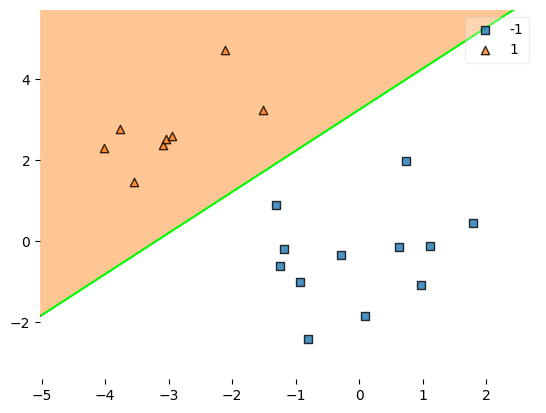

In [34]:
ax = plot_decision_regions(X, y, lr)
x = np.linspace(-5, 3, 100)
y2 = -(w[0]/w[1]) * x - (lr.intercept_[0]/w[1])
ax.plot(x, y2, c='lime')
plt.show()

## What is a loss function?

- Many machine learning algorithms involve minimizing a loss

### Least squares: the squared loss

- This is the loss function used by scikit-learn for linear regression

$$
L(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2
$$

- Scikit-learn actually uses $\frac{1}{m}$ rather than $\frac{1}{2m}$
- In this tutorial, the example doesn't bother to divide by anything at all
- Minimization is with respect to the coefficients or parameters of the model
- We can think of the `fit()` function as running code that minimizes the loss
- Note that the `score()` function provided by by scikit-learn, `model.score()`, isn't necessarily the loss function


### Classification errors: the 0-1 loss

- Squared loss is not appropriate for classification problems (more on this later)
- A natural loss for classification problems is the number of errors
    - This is the **0-1 loss**: it's 0 for a correct prediction and 1 for an incorrect prediction
    - But this loss is **hard to minimize**

### Minimizing a loss


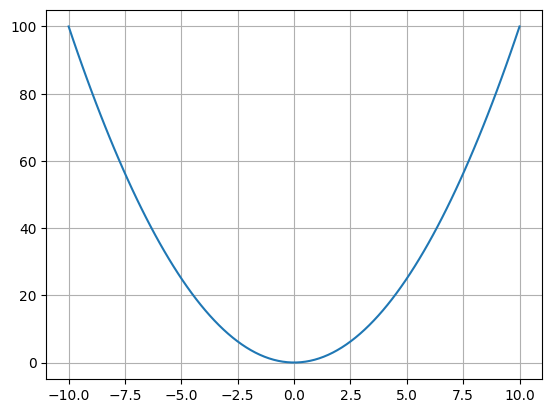

In [35]:
x = np.linspace(-10, 10, 100)
plt.plot(x, np.square(x))
plt.grid()
plt.show()

In [36]:
# from scipy.optimize import minimize

# 0 is our initial guess
# .x grabs the input value that makes the fuction as small as possible
minimize(np.square, 0).x

array([0.])

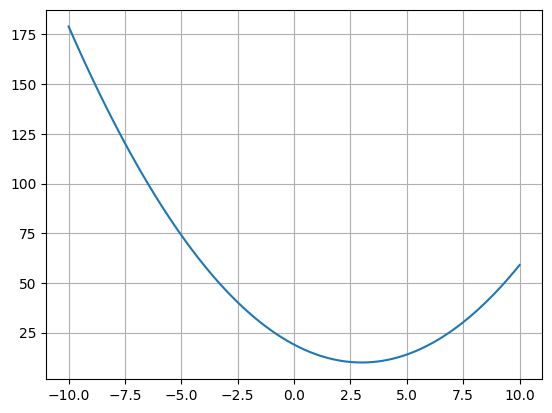

In [37]:
parabola = lambda x: (x - 3)**2 + 10

x = np.linspace(-10, 10, 100)
plt.plot(x, parabola(x))
plt.grid()
plt.show()

In [38]:
minimize(parabola, 0).x

array([3.00000003])

In [39]:
minimize(parabola, 0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 10.0
        x: [ 3.000e+00]
      nit: 2
      jac: [ 1.192e-07]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

### Boston Housing Dataset

In [40]:
url = 'https://drive.google.com/uc?id=1VZWMJjET_gkU32tu62FVHqsMZr27u1zF'
boston = pd.read_csv(url, header=None, delimiter=r'\s+')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [41]:
X = boston.iloc[:, :-1].values
y = boston.iloc[:, 13].values
X.shape, y.shape

((506, 13), (506,))

### Mininizing a loss function

In [42]:
def my_loss(w):
    s = 0
    for i in range(y.size):
        # get the true and predicted target values for hte example 'i'
        y_i_true = y[i]
        y_i_pred = w @ X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

In [43]:
# returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
w_fit

array([-9.28967744e-02,  4.87152733e-02, -4.05725869e-03,  2.85399035e+00,
       -2.86835796e+00,  5.92815444e+00, -7.26946531e-03, -9.68512930e-01,
        1.71156095e-01, -9.39661630e-03, -3.92188695e-01,  1.49054820e-02,
       -4.16303942e-01])

In [44]:
# compare with sklearn's LinearRegression() coefficients
lr = LinearRegression(fit_intercept=False).fit(X, y)
lr.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

## Loss function diagrams

### 0-1 loss diagram

- This is the loss for a **particular training example**
- To get the whole loss, we need to sum up the contribution from all examples

<img src='https://drive.google.com/uc?export=view&id=1NXqTGLBqYmC1VGOVY8fJPnG5r_TsgPlV'>
  

### Linear regression loss diagram

- The **raw model output** is the prediction
- The loss is higher as the prediction is further way from the true target value (in this case we are assuming 1)

<img src='https://drive.google.com/uc?export=view&id=1AkY4ZEvabHME3RfqiH5eRE8PQNB3g6gI'>

  

### Logistic loss diagram (used in logistic regression)

<img src='https://drive.google.com/uc?export=view&id=1ba2C5RMAeaeUxxzHu93D1UT6hRRqlOi5'>

  

### Hinge loss diagram (used in SVMs)

<img src='https://drive.google.com/uc?export=view&id=15r5fpy_inxB0MNAt0H7PUMTzouRbK6vD'>

### Comparing the logistic and hinge losses

In [45]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

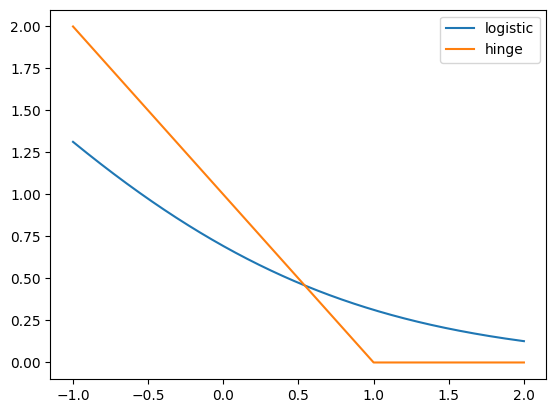

In [46]:
grid = np.linspace(-1, 2, 1000)

plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [47]:
X, y = breast_cancer.data, breast_cancer.target
X.shape, y.shape

((569, 30), (569,))

In [48]:
X = X[:,:10]
y[y==0] = -1

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w @ X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

In [51]:
# returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
w_fit

array([ 1.03587021, -1.6537831 ,  4.08338098, -9.40923549, -1.06786235,
        0.07891344, -0.85110102, -2.44103476, -0.45285573,  0.43353697])

In [52]:
# compare with sklearn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X, y)
lr.coef_

array([[ 2.73338052, -1.65192532,  2.20690331, -9.33623298, -1.0880802 ,
         0.20775974, -0.84976157, -2.40130375, -0.45569414,  0.41676196]])